In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import autograd functionality
import autograd.numpy as np
#from autograd.util import flatten_func
from autograd.util import flatten_func
from autograd import grad as compute_grad   
import math
import sys
# import custom utilities
import custom_utilities as util

# import various other libraries
import copy
import matplotlib.pyplot as plt

# this is needed to compensate for %matplotl+ib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [18]:
csv = open('d.csv', 'r')
data=[]
num=0
for line in csv:
    ls=line.split(" ")
    data.append([float(ls[0]),float(ls[1]),float(ls[2])])
    num += 1
csv.close()
data=np.array(data)
#print(data)
print(num)
x,y,z = data.T

899


In [45]:
zlist=[]
for d in data:
    z=pfp_reg(1,x,y,[d[0]],[d[1]])
    zlist.append(z)
zlist=np.asarray(zlist)
#print(zlist)
b,k=zlist.T
f=(np.max(k)+np.min(k))/2
f

-0.2909350168147818

In [20]:
def pfp_reg(n, x, y, xf, yf) :
    mat = np.empty((n + 1 + len(xf),) * 2)
    vec = np.empty((n + 1 + len(xf),))
    x_n = x**np.arange(2 * n + 1)[:, None]
    yx_n = np.sum(x_n[:n + 1] * y, axis=1)
    x_n = np.sum(x_n, axis=1)
    idx = np.arange(n + 1) + np.arange(n + 1)[:, None]
    mat[:n + 1, :n + 1] = np.take(x_n, idx)
    xf_n = xf**np.arange(n + 1)[:, None]
    mat[:n + 1, n + 1:] = xf_n / 2
    mat[n + 1:, :n + 1] = xf_n.T
    mat[n + 1:, n + 1:] = 0
    vec[:n + 1] = yx_n
    vec[n + 1:] = yf
    params = np.linalg.solve(mat, vec)
    return params[:n + 1]

In [11]:
z2=polyfit_with_fixed_points(1,x,y,[3.0],[0.1])

In [ ]:
#randomly select all points for the linear regression
#sample = np.array(random.sample(list(model), 4300))
sample=data
#print(np.ones(len(sample))[:, np.newaxis])
sample_pos=np.concatenate((np.ones(len(sample))[:, np.newaxis],sample[:,:-1]),axis=1)
#print(sample_pos)

In [14]:
# gradient descent function
def gradient_descent(g,w,alpha,max_its,beta,version):    
    # flatten the input function, create gradient based on flat function
    g_flat, unflatten, w = flatten_func(g, w)
    grad = compute_grad(g_flat)

    # record history
    w_hist = []
    w_hist.append(unflatten(w))

    # start gradient descent loop
    z = np.zeros((np.shape(w)))      # momentum term
    
    # over the line
    for k in range(max_its):   
        # plug in value into func and derivative
        grad_eval = grad(w)
        grad_eval.shape = np.shape(w)

        ### normalized or unnormalized descent step? ###
        if version == 'normalized':
            grad_norm = np.linalg.norm(grad_eval)
            if grad_norm == 0:
                grad_norm += 10**-6*np.sign(2*np.random.rand(1) - 1)
            grad_eval /= grad_norm
            
        # take descent step with momentum
        z = beta*z + grad_eval
        w = w - alpha*z

        # record weight update
        w_hist.append(unflatten(w))

    return w_hist

[ 0.88947368 -0.26315789]


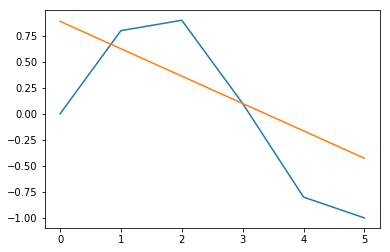

In [13]:
# normalize a dataset
sample_pos_means = np.mean(sample_pos,axis = 0)
sample_pos_stds = np.std(sample_pos,axis = 0)

# a normalization function 
def normalize(data,data_mean,data_std):
    normalized_data = (data - data_mean)/data_std
    return normalized_data
# normalize data using the function above
#x_orig = copy.deepcopy(x)     # make a copy of the original input
#print(sample_pos_means,sample_pos_stds)
sample_pos_norm = normalize(sample_pos[:,1:],sample_pos_means[1:],sample_pos_stds[1:])
sample_pos_norm = np.concatenate((np.ones(len(sample_pos))[:, np.newaxis],sample_pos_norm),axis=1)
#print(sample_pos_norm)
z_norm = sample_pos_norm[:,-1][:,np.newaxis]
#z_norm.shape(len(z_norm,1))
data_norm = sample_pos_norm[:,:-1]

In [ ]:
w = np.random.randn(2,1)*0.01
print(w)
# least squares MSE rergession
least_squares = lambda w: np.sum((np.dot(data_norm,w) - z_norm)**4)
alpha = 10**(-3)
max_its = 800

In [ ]:
# run gradient descent
weight_history = gradient_descent(least_squares,w,alpha,max_its,beta = 0,version = 'normalized')

# plot cost function history
cost_history = [least_squares(v) for v in weight_history]
histories = [cost_history]

In [ ]:
# plot everything
demo = util.Visualizer()
demo.compare_regression_histories(histories)